## Tackling the Health Crises in Africa

## by Gift Omodu



### Data Overview

The data consist of records from 1990 to 2019. These records includes: Causes of death, Number of death by age groups, Medical doctors per 10,000 population, Country codes, World population, Health expenditure(% of GDP)  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


## Assessing Data 


In [2]:
def read_data(data):
    name = pd.read_csv(data)
    
    return name

In [3]:
def read_data2(data):
    name = pd.read_excel(data)
    
    return name

In [4]:
deaths_df = read_data("Final Datasets/1. annual-number-of-deaths-by-cause.csv")
deaths_df.sample(5)

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
4980,Portugal,PRT,2000,NaN,82.0,3016.0,704.0,116.0,0.0,148.0,...,2367.0,33.0,98.0,NaN,2416.0,5553.0,2870.0,5111.0,168.0,17.0
5170,Rwanda,RWA,2010,NaN,1184.0,474.0,100.0,1685.0,4271.0,266.0,...,877.0,184.0,1639.0,6.0,2176.0,1986.0,1967.0,3266.0,212.0,173.0
4230,Nepal,NPL,1998,NaN,1584.0,907.0,294.0,4627.0,73.0,2373.0,...,2010.0,618.0,4124.0,NaN,2076.0,21581.0,5685.0,8391.0,156.0,1092.0
4494,North Korea,PRK,2013,>1,276.0,3834.0,1140.0,435.0,3.0,1704.0,...,4040.0,454.0,362.0,NaN,8397.0,29901.0,4930.0,8797.0,304.0,145.0
3402,Lebanon,LBN,2013,NaN,40.0,1009.0,203.0,15.0,0.0,59.0,...,1027.0,34.0,12.0,190.0,449.0,1127.0,542.0,869.0,88.0,146.0


In [5]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        7273 non-null   object 
 1   Code                                          6206 non-null   object 
 2   Year                                          7273 non-null   int64  
 3   Number of executions (Amnesty International)  267 non-null    object 
 4   Meningitis                                    6840 non-null   float64
 5   Alzheimer's disease and other dementias       6840 non-null   float64
 6   Parkinson's disease                           6840 non-null   float64
 7   Nutritional deficiencies                      6840 non-null   float64
 8   Malaria                                       6840 non-null   float64
 9   Drowning                                      6840 non-null   f

In [6]:
deaths_df.isnull().sum()

Entity                                             0
Code                                            1067
Year                                               0
Number of executions (Amnesty International)    7006
Meningitis                                       433
Alzheimer's disease and other dementias          433
Parkinson's disease                              433
Nutritional deficiencies                         433
Malaria                                          433
Drowning                                         433
Interpersonal violence                           433
Maternal disorders                               433
HIV/AIDS                                         433
Drug use disorders                               433
Tuberculosis                                     433
Cardiovascular diseases                          433
Lower respiratory infections                     433
Neonatal disorders                               433
Alcohol use disorders                         

In [7]:
deaths_df.duplicated().sum()

0

In [8]:
deaths_df.describe()

,Year,Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,Maternal disorders,HIV/AIDS,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
count,7273.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,...,6.840000e+03,6840.000000,6840.000000,2891.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000
mean,2004.425134,8213.149561,2.736319e+04,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,2.814125e+04,...,2.506893e+04,2145.455848,9531.528801,349.235905,3.063496e+04,9.130390e+04,3.189892e+04,5.652551e+04,3006.043275,3112.066520
std,8.623572,34982.933895,1.113146e+05,25767.447063,48289.687100,97346.780570,35879.406010,40888.793762,26355.210370,1.391973e+05,...,9.600839e+04,8433.507625,41689.675155,1917.143788,1.166999e+05,3.772013e+05,1.194387e+05,2.109884e+05,11211.885249,14440.219516
min,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1997.000000,19.000000,1.287500e+02,37.000000,11.000000,0.000000,39.000000,48.000000,6.000000,1.400000e+01,...,2.140000e+02,8.000000,6.000000,0.000000,2.077500e+02,3.685000e+02,2.047500e+02,4.000000e+02,21.000000,2.000000
50%,2004.000000,150.500000,8.455000e+02,209.000000,159.000000,0.000000,253.000000,342.000000,70.500000,1.870000e+02,...,1.080000e+03,72.000000,120.000000,5.000000,1.239500e+03,2.104000e+03,1.541000e+03,2.778500e+03,152.000000,21.500000
75%,2012.000000,1622.250000,4.251000e+03,984.000000,2204.000000,1017.250000,1014.250000,1391.250000,1244.500000,3.836500e+03,...,4.497500e+03,371.000000,2120.000000,60.000000,5.786250e+03,9.013250e+03,5.670500e+03,9.594000e+03,593.250000,264.000000
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.000000,460665.000000,463129.000000,302586.000000,1.844490e+06,...,1.427232e+06,92101.000000,656314.000000,44490.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000


In [9]:
age_df = read_data("Final Datasets/2. number-of-deaths-by-age-group.csv")
age_df.sample(5)

,Entity,Code,Year,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
5149,Scotland,NaN,2009,38749,11598,3512,59,289
2380,Guam,GUM,2000,269,211,160,11,41
6347,United States,USA,2007,1596513,569699,234503,6157,34029
5172,Senegal,SEN,2002,18841,15564,16075,3213,41353
2678,Indonesia,IDN,1998,404318,377405,288884,41565,280989


In [10]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   6840 non-null   object
 1   Code                     6150 non-null   object
 2   Year                     6840 non-null   int64 
 3   Deaths 70+ years         6840 non-null   int64 
 4   Deaths 50-69 years       6840 non-null   int64 
 5   Deaths Age: 15-49 years  6840 non-null   int64 
 6   Deaths 5-14 years        6840 non-null   int64 
 7   Deaths Under 5           6840 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 427.6+ KB


In [11]:
age_df.describe()

,Year,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
count,6840.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03
mean,2004.500000,5.674685e+05,3.253844e+05,2.003344e+05,2.451118e+04,2.021524e+05
std,8.656074,2.196604e+06,1.242145e+06,7.598624e+05,1.016780e+05,8.520685e+05
min,1990.000000,5.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1997.000000,3.668750e+03,2.927000e+03,1.697000e+03,7.900000e+01,3.650000e+02
50%,2004.500000,2.141700e+04,1.428650e+04,8.815000e+03,6.065000e+02,3.487000e+03
75%,2012.000000,8.464750e+04,5.242625e+04,3.652850e+04,5.349500e+03,4.441825e+04
max,2019.000000,2.840781e+07,1.496755e+07,8.878754e+06,1.308749e+06,1.198120e+07


In [12]:
age_df.isnull().sum()

Entity                       0
Code                       690
Year                         0
Deaths 70+ years             0
Deaths 50-69 years           0
Deaths Age: 15-49 years      0
Deaths 5-14 years            0
Deaths Under 5               0
dtype: int64

In [13]:
age_df.duplicated().sum()

0

In [14]:
age_df.nunique()

Entity                      228
Code                        205
Year                         30
Deaths 70+ years           6101
Deaths 50-69 years         5894
Deaths Age: 15-49 years    5623
Deaths 5-14 years          3524
Deaths Under 5             4886
dtype: int64

In [15]:
country_code= read_data("Final Datasets/4. ISO 3166_country-and-continent-codes-list-csv.csv")
country_code.sample(5)

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
118,Asia,AS,Kyrgyz Republic,KG,KGZ,417.0
249,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
169,Oceania,OC,"Palau, Republic of",PW,PLW,585.0
187,North America,NaN,Saint Barthelemy,BL,BLM,652.0
137,Africa,AF,"Mauritius, Republic of",MU,MUS,480.0


In [16]:
country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             254 non-null    object 
 1   Continent_Code             212 non-null    object 
 2   Country_Name               254 non-null    object 
 3   Two_Letter_Country_Code    253 non-null    object 
 4   Three_Letter_Country_Code  254 non-null    object 
 5   Country_Number             250 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.0+ KB


In [17]:
country_code.isnull().sum()

Continent_Name                0
Continent_Code               42
Country_Name                  0
Two_Letter_Country_Code       1
Three_Letter_Country_Code     0
Country_Number                4
dtype: int64

In [18]:
country_code.duplicated().sum()

0

In [19]:
afr_country = country_code.query('Continent_Code == "AF"')
afr_country.count()

Continent_Name               58
Continent_Code               58
Country_Name                 58
Two_Letter_Country_Code      57
Three_Letter_Country_Code    58
Country_Number               58
dtype: int64

In [20]:
afr_country.nunique()

Continent_Name                1
Continent_Code                1
Country_Name                 58
Two_Letter_Country_Code      57
Three_Letter_Country_Code    58
Country_Number               58
dtype: int64

In [21]:
world_ppl = read_data("Final Datasets/5. World Population.csv")
world_ppl.sample(5)

,Entity,Code,Year,Population (historical estimates)
44863,Sierra Leone,SLE,1827,790609
11507,Costa Rica,CRI,1992,3321943
40931,Qatar,QAT,1841,14092
14799,El Salvador,SLV,1847,352088
32734,Monaco,MCO,1807,7789


In [22]:
world_ppl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56913 entries, 0 to 56912
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             56913 non-null  object
 1   Code                               54251 non-null  object
 2   Year                               56913 non-null  int64 
 3   Population (historical estimates)  56913 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


In [23]:
world_ppl.duplicated().sum()

0

In [24]:
world_ppl.isnull().sum()

Entity                                  0
Code                                 2662
Year                                    0
Population (historical estimates)       0
dtype: int64

In [25]:
doctors_df = read_data2("Final Datasets/3. Medical Doctors Per 10000 population.xlsx")
doctors_df.sample(5)

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,ThreeLocCode,Location,Period,FactValueNumeric,Value
11191,HWF_0005,Medical doctors not further defined (number),WPR,Western Pacific,BRN,Brunei Darussalam,2005,390.00,390
8465,HWF_0004,Specialist medical practitioners (number),EUR,Europe,PRT,Portugal,1993,11804.00,11 804
7132,HWF_0003,Generalist medical practitioners (number),EUR,Europe,MKD,The former Yugoslav Republic of Macedonia,1991,2100.00,2100
250,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,MUS,Mauritius,2017,23.15,23.15
7742,HWF_0004,Specialist medical practitioners (number),EUR,Europe,ALB,Albania,2020,3316.00,3316


In [26]:
doctors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IndicatorCode       11508 non-null  object 
 1   Indicator           11508 non-null  object 
 2   ParentLocationCode  11508 non-null  object 
 3   ParentLocation      11508 non-null  object 
 4   ThreeLocCode        11508 non-null  object 
 5   Location            11508 non-null  object 
 6   Period              11508 non-null  int64  
 7   FactValueNumeric    11508 non-null  float64
 8   Value               11508 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 809.3+ KB


In [27]:
doctors_df.duplicated().sum()

0

In [28]:
doctors_df.isnull().sum()

IndicatorCode         0
Indicator             0
ParentLocationCode    0
ParentLocation        0
ThreeLocCode          0
Location              0
Period                0
FactValueNumeric      0
Value                 0
dtype: int64

In [29]:
afr_doctors = doctors_df.query('ParentLocationCode == "AFR"')
afr_doctors.count()

IndicatorCode         1356
Indicator             1356
ParentLocationCode    1356
ParentLocation        1356
ThreeLocCode          1356
Location              1356
Period                1356
FactValueNumeric      1356
Value                 1356
dtype: int64

In [30]:
che_df = read_data2("Final Datasets/6. Current health expenditure (% of GDP).xlsx")
che_df.sample(5)

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
235,Turkmenistan,TKM,Current health expenditure (% of GDP),6.891643,8.148754,7.021970,8.512169,10.577514,9.555304,8.413214,...,4.775951,5.150633,5.497773,6.297936,6.623054,6.935368,6.606849,6.568625,NaN,NaN
23,"Bahamas, The",BHS,Current health expenditure (% of GDP),3.804870,3.924409,3.812520,4.019986,4.046282,4.031965,4.309358,...,5.319071,5.591329,5.570970,5.227199,5.620388,6.608887,5.929999,5.749775,NaN,NaN
100,Haiti,HTI,Current health expenditure (% of GDP),3.959640,3.730882,3.405104,3.414277,3.447301,3.368438,3.531488,...,5.564624,4.219750,4.626871,5.066901,4.900239,4.787472,4.574742,4.728090,NaN,NaN
95,High income,HIC,Current health expenditure (% of GDP),9.413337,9.903624,10.331964,10.503458,10.464723,10.499670,10.547683,...,11.690516,11.717293,11.865043,12.246652,12.414776,12.367972,12.292041,12.491098,NaN,NaN
9,Argentina,ARG,Current health expenditure (% of GDP),8.220010,8.371798,7.393312,6.894516,7.228683,7.610789,7.640328,...,9.827282,9.780973,9.671291,10.229339,9.001897,10.442255,9.666465,9.510071,NaN,NaN


In [31]:
che_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   2000            232 non-null    float64
 4   2001            232 non-null    float64
 5   2002            233 non-null    float64
 6   2003            235 non-null    float64
 7   2004            235 non-null    float64
 8   2005            235 non-null    float64
 9   2006            235 non-null    float64
 10  2007            235 non-null    float64
 11  2008            235 non-null    float64
 12  2009            235 non-null    float64
 13  2010            236 non-null    float64
 14  2011            237 non-null    float64
 15  2012            236 non-null    float64
 16  2013            235 non-null    float64
 17  2014            235 non-null    flo

In [32]:
che_df.duplicated().sum()

0



## CLEANING THROUGH DATA SETS



### African Country Names Data : "afr_country"

#### Define: 

       1. Rename column "Three+Letter_Country_Code" to "Code"
       2. Drop column "Two_Letter_Country_Code
       3. Extract country names from the "Country_Name" column

#### Code:

In [33]:
afr_country.rename(columns= {"Three_Letter_Country_Code" : "Code"}, inplace=True)

C:\Users\UG\AppData\Local\Temp\ipykernel_80\4049029065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_country.rename(columns= {"Three_Letter_Country_Code" : "Code"}, inplace=True)


In [34]:
afr_country.drop(columns= "Two_Letter_Country_Code", axis =1, inplace=True)

C:\Users\UG\AppData\Local\Temp\ipykernel_80\3086410313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_country.drop(columns= "Two_Letter_Country_Code", axis =1, inplace=True)


In [35]:
afr_country["Country_Name"] = afr_country['Country_Name'].str.split(",").str[0]

C:\Users\UG\AppData\Local\Temp\ipykernel_80\3693049461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_country["Country_Name"] = afr_country['Country_Name'].str.split(",").str[0]


#### Test:

In [36]:
afr_country.sample(5)

,Continent_Name,Continent_Code,Country_Name,Code,Country_Number
221,Africa,AF,Togo,TGO,768.0
231,Africa,AF,Uganda,UGA,800.0
6,Africa,AF,Angola,AGO,24.0
51,Africa,AF,Congo,COD,180.0
64,Africa,AF,Equatorial Guinea,GNQ,226.0


In [37]:
afr_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 3 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Continent_Name  58 non-null     object 
 1   Continent_Code  58 non-null     object 
 2   Country_Name    58 non-null     object 
 3   Code            58 non-null     object 
 4   Country_Number  58 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.7+ KB


In [38]:
afr_country["Code"].nunique()

58

In [39]:
afr_country.drop('Country_Number', axis=1, inplace=True)

C:\Users\UG\AppData\Local\Temp\ipykernel_80\33610126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_country.drop('Country_Number', axis=1, inplace=True)


In [40]:
afr_country.drop(columns=["Continent_Name", "Continent_Code"], axis=1, inplace=True)

C:\Users\UG\AppData\Local\Temp\ipykernel_80\2052399133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_country.drop(columns=["Continent_Name", "Continent_Code"], axis=1, inplace=True)


In [41]:
afr_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 3 to 249
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country_Name  58 non-null     object
 1   Code          58 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [42]:
afr_df= afr_country

In [43]:
df1 = afr_df.merge(deaths_df, on ='Code', how="inner")

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 0 to 1621
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country_Name                                  1622 non-null   object 
 1   Code                                          1622 non-null   object 
 2   Entity                                        1622 non-null   object 
 3   Year                                          1622 non-null   int64  
 4   Number of executions (Amnesty International)  64 non-null     object 
 5   Meningitis                                    1620 non-null   float64
 6   Alzheimer's disease and other dementias       1620 non-null   float64
 7   Parkinson's disease                           1620 non-null   float64
 8   Nutritional deficiencies                      1620 non-null   float64
 9   Malaria                                       1620 non-null   f

In [45]:
df1.isnull().sum()

Country_Name                                       0
Code                                               0
Entity                                             0
Year                                               0
Number of executions (Amnesty International)    1558
Meningitis                                         2
Alzheimer's disease and other dementias            2
Parkinson's disease                                2
Nutritional deficiencies                           2
Malaria                                            2
Drowning                                           2
Interpersonal violence                             2
Maternal disorders                                 2
HIV/AIDS                                           2
Drug use disorders                                 2
Tuberculosis                                       2
Cardiovascular diseases                            2
Lower respiratory infections                       2
Neonatal disorders                            

In [46]:
df1.drop(columns=['Entity','Code'], axis=1, inplace=True)

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 0 to 1621
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country_Name                                  1622 non-null   object 
 1   Year                                          1622 non-null   int64  
 2   Number of executions (Amnesty International)  64 non-null     object 
 3   Meningitis                                    1620 non-null   float64
 4   Alzheimer's disease and other dementias       1620 non-null   float64
 5   Parkinson's disease                           1620 non-null   float64
 6   Nutritional deficiencies                      1620 non-null   float64
 7   Malaria                                       1620 non-null   float64
 8   Drowning                                      1620 non-null   float64
 9   Interpersonal violence                        1620 non-null   f

In [48]:
df1.isnull().sum()

Country_Name                                       0
Year                                               0
Number of executions (Amnesty International)    1558
Meningitis                                         2
Alzheimer's disease and other dementias            2
Parkinson's disease                                2
Nutritional deficiencies                           2
Malaria                                            2
Drowning                                           2
Interpersonal violence                             2
Maternal disorders                                 2
HIV/AIDS                                           2
Drug use disorders                                 2
Tuberculosis                                       2
Cardiovascular diseases                            2
Lower respiratory infections                       2
Neonatal disorders                                 2
Alcohol use disorders                              2
Self                                          

In [49]:
df1['Country_Name'].isnull().sum()

0

In [50]:
df1.fillna(0)

,Country_Name,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
0,Algeria,1990,0,838.0,1337.0,439.0,453.0,9.0,1207.0,491.0,...,3559.0,485.0,422.0,3.0,13438.0,4410.0,2401.0,3981.0,1113.0,486.0
1,Algeria,1991,0,794.0,1411.0,451.0,439.0,9.0,1136.0,484.0,...,3640.0,469.0,408.0,42.0,13120.0,4481.0,2456.0,4033.0,1078.0,478.0
2,Algeria,1992,0,763.0,1494.0,470.0,427.0,12.0,1111.0,497.0,...,3687.0,464.0,396.0,236.0,13115.0,4571.0,2500.0,4083.0,1071.0,472.0
3,Algeria,1993,0,736.0,1582.0,488.0,417.0,12.0,1092.0,513.0,...,3741.0,461.0,386.0,0.0,13154.0,4668.0,2542.0,4136.0,1067.0,470.0
4,Algeria,1994,0,708.0,1675.0,509.0,402.0,8.0,1086.0,553.0,...,3806.0,460.0,370.0,500.0,13326.0,4773.0,2588.0,4193.0,1095.0,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Zambia,2015,0,2256.0,626.0,173.0,2269.0,5235.0,406.0,1428.0,...,1703.0,305.0,2199.0,0.0,2173.0,2214.0,4026.0,5804.0,326.0,270.0
1618,Zambia,2016,0,2174.0,651.0,178.0,2148.0,4716.0,391.0,1490.0,...,1746.0,304.0,2078.0,0.0,2209.0,2249.0,4179.0,6000.0,323.0,268.0
1619,Zambia,2017,0,2156.0,689.0,186.0,2087.0,4287.0,386.0,1531.0,...,1813.0,307.0,2016.0,0.0,2252.0,2302.0,4386.0,6275.0,325.0,270.0
1620,Zambia,2018,0,2088.0,726.0,195.0,1954.0,4815.0,366.0,1577.0,...,1870.0,306.0,1884.0,0.0,2258.0,2341.0,4481.0,6385.0,323.0,265.0


In [51]:
afr_dt = df1.copy()

In [52]:
afr_dt.isnull().sum()

Country_Name                                       0
Year                                               0
Number of executions (Amnesty International)    1558
Meningitis                                         2
Alzheimer's disease and other dementias            2
Parkinson's disease                                2
Nutritional deficiencies                           2
Malaria                                            2
Drowning                                           2
Interpersonal violence                             2
Maternal disorders                                 2
HIV/AIDS                                           2
Drug use disorders                                 2
Tuberculosis                                       2
Cardiovascular diseases                            2
Lower respiratory infections                       2
Neonatal disorders                                 2
Alcohol use disorders                              2
Self                                          

In [53]:
afr_dt.fillna(0, inplace=True)

In [54]:
afr_dt.isnull().sum()

Country_Name                                    0
Year                                            0
Number of executions (Amnesty International)    0
Meningitis                                      0
Alzheimer's disease and other dementias         0
Parkinson's disease                             0
Nutritional deficiencies                        0
Malaria                                         0
Drowning                                        0
Interpersonal violence                          0
Maternal disorders                              0
HIV/AIDS                                        0
Drug use disorders                              0
Tuberculosis                                    0
Cardiovascular diseases                         0
Lower respiratory infections                    0
Neonatal disorders                              0
Alcohol use disorders                           0
Self                                            0
Exposure to forces of nature                    0


In [55]:
afr_age = afr_df.merge(age_df, on="Code", how="inner")

In [56]:
afr_age.drop("Entity", axis=1, inplace=True)

In [57]:
afr_age.drop("Code", axis=1, inplace=True)

In [58]:
afr_age.tail()

,Country_Name,Year,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
1615,Zambia,2015,20828,24196,38387,5240,35951
1616,Zambia,2016,21403,24892,38213,4846,34998
1617,Zambia,2017,22112,25745,38420,4681,33892
1618,Zambia,2018,22784,26416,37830,4370,32543
1619,Zambia,2019,23410,27051,37212,4192,31490


In [59]:
afr_ppl = afr_df.merge(world_ppl, on= "Code", how="inner")

In [60]:
afr_ppl.drop(columns=["Entity", "Code"], axis=1, inplace=True)

In [61]:
afr_ppl.head(0)

,Country_Name,Year,Population (historical estimates)


In [62]:
afr_ppl.rename(columns={"Population (historical estimates)": "Population"}, inplace=True)

In [63]:
afr_pop = afr_ppl.query("Year > 1989")

In [64]:
afr_pop.sample(5)

,Country_Name,Year,Population
7774,Mauritius,2000,1215930
3133,Benin,1994,5923401
5998,Lesotho,2010,2022752
13187,Uganda,2019,42949076
8031,Morocco,1998,27791828


In [65]:
afr_doctors.drop(columns=["IndicatorCode","Indicator","ParentLocationCode","ParentLocation"], axis=1, inplace=True)

C:\Users\UG\AppData\Local\Temp\ipykernel_80\1591588270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_doctors.drop(columns=["IndicatorCode","Indicator","ParentLocationCode","ParentLocation"], axis=1, inplace=True)


In [66]:
afr_doctors.drop(columns=["ThreeLocCode", "Value"], axis=1, inplace=True)

C:\Users\UG\AppData\Local\Temp\ipykernel_80\726032145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_doctors.drop(columns=["ThreeLocCode", "Value"], axis=1, inplace=True)


In [67]:
afr_doctors.rename(columns={'FactValueNumeric' : 'Value'}, inplace=True)

C:\Users\UG\AppData\Local\Temp\ipykernel_80\2941226439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afr_doctors.rename(columns={'FactValueNumeric' : 'Value'}, inplace=True)


In [68]:
afr_doctors.sample(4)

,Location,Period,Value
8793,Cabo Verde,2013,308.0
2859,Benin,2019,763.0
6282,Eritrea,2018,160.0
8815,Eritrea,2006,135.0


In [69]:
che_df.head()

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),6.252428,6.390627,5.969416,6.635666,6.710734,6.528098,6.492506,...,6.562794,6.565689,6.152063,6.482263,6.390654,6.317654,6.286829,6.266386,NaN,NaN
2,Afghanistan,AFG,Current health expenditure (% of GDP),NaN,NaN,9.443390,8.941258,9.808474,9.948290,10.622766,...,7.897176,8.805941,9.528871,10.105348,11.818562,12.620817,14.126743,13.242202,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),3.771302,3.770256,3.387634,4.681099,4.481882,4.277262,4.139578,...,3.505065,3.621925,3.614749,3.834676,3.811248,3.789624,3.393160,3.366100,NaN,NaN
4,Angola,AGO,Current health expenditure (% of GDP),1.908599,4.483516,3.329461,3.547973,3.967201,2.852197,2.685537,...,2.395750,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360,NaN,NaN


In [70]:
che_df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
2000               34
2001               34
2002               33
2003               31
2004               31
2005               31
2006               31
2007               31
2008               31
2009               31
2010               30
2011               29
2012               30
2013               31
2014               31
2015               31
2016               32
2017               31
2018               31
2019               32
2020              266
2021              266
dtype: int64

In [71]:
che_df.drop(columns=[2020, 2021], axis=1, inplace=True)

In [72]:
che_df.fillna(0, inplace=True)

In [73]:
che_df.rename(columns={'Country Code': 'Code'}, inplace=True)

In [74]:
che_df.head()

,Country Name,Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Current health expenditure (% of GDP),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),6.252428,6.390627,5.969416,6.635666,6.710734,6.528098,6.492506,...,6.922891,6.773979,6.562794,6.565689,6.152063,6.482263,6.390654,6.317654,6.286829,6.266386
2,Afghanistan,AFG,Current health expenditure (% of GDP),0.000000,0.000000,9.443390,8.941258,9.808474,9.948290,10.622766,...,8.569672,8.561907,7.897176,8.805941,9.528871,10.105348,11.818562,12.620817,14.126743,13.242202
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),3.771302,3.770256,3.387634,4.681099,4.481882,4.277262,4.139578,...,3.521739,3.550677,3.505065,3.621925,3.614749,3.834676,3.811248,3.789624,3.393160,3.366100
4,Angola,AGO,Current health expenditure (% of GDP),1.908599,4.483516,3.329461,3.547973,3.967201,2.852197,2.685537,...,2.695100,2.645608,2.395750,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360


In [75]:
che_df[che_df.Code == 'COD']

,Country Name,Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
43,"Congo, Dem. Rep.",COD,Current health expenditure (% of GDP),1.5504,2.70775,2.654775,3.818179,4.42029,4.252656,4.393809,...,3.860356,3.262672,3.300994,3.566633,3.97874,3.969213,4.366031,4.156466,3.302493,3.536261


In [76]:
afr_che = afr_country.merge(che_df, on ="Code", how="left")

In [77]:
afr_che.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Name    58 non-null     object 
 1   Code            58 non-null     object 
 2   Country Name    54 non-null     object 
 3   Indicator Name  54 non-null     object 
 4   2000            54 non-null     float64
 5   2001            54 non-null     float64
 6   2002            54 non-null     float64
 7   2003            54 non-null     float64
 8   2004            54 non-null     float64
 9   2005            54 non-null     float64
 10  2006            54 non-null     float64
 11  2007            54 non-null     float64
 12  2008            54 non-null     float64
 13  2009            54 non-null     float64
 14  2010            54 non-null     float64
 15  2011            54 non-null     float64
 16  2012            54 non-null     float64
 17  2013            54 non-null     float

In [78]:
afr_che.drop(columns=['Country Name', 'Indicator Name'], axis=1, inplace=True)

In [79]:
afr_che.drop(10, inplace=True)

### Summary of the cleaned data set

Clean data set were grouped according to the following:

afr_age => dataframe shows the death by age category.

afr_dt => dataframe shows the causes of death.

afr_pop => dataframe shows the population growth in Africa.

afr_doctors => dataframe shows the amount of doctors per 10,000 patient.

afr_che => dataframe shows the African expenditure on health by %GDP.




## EDA

In [80]:
afr_dt.head()

,Country_Name,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
0,Algeria,1990,0,838.0,1337.0,439.0,453.0,9.0,1207.0,491.0,...,3559.0,485.0,422.0,3.0,13438.0,4410.0,2401.0,3981.0,1113.0,486.0
1,Algeria,1991,0,794.0,1411.0,451.0,439.0,9.0,1136.0,484.0,...,3640.0,469.0,408.0,42.0,13120.0,4481.0,2456.0,4033.0,1078.0,478.0
2,Algeria,1992,0,763.0,1494.0,470.0,427.0,12.0,1111.0,497.0,...,3687.0,464.0,396.0,236.0,13115.0,4571.0,2500.0,4083.0,1071.0,472.0
3,Algeria,1993,0,736.0,1582.0,488.0,417.0,12.0,1092.0,513.0,...,3741.0,461.0,386.0,0.0,13154.0,4668.0,2542.0,4136.0,1067.0,470.0
4,Algeria,1994,0,708.0,1675.0,509.0,402.0,8.0,1086.0,553.0,...,3806.0,460.0,370.0,500.0,13326.0,4773.0,2588.0,4193.0,1095.0,469.0


In [81]:
afr_dt['Total Death'] = afr_dt.sum(axis=1)

C:\Users\UG\AppData\Local\Temp\ipykernel_80\3463311214.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  afr_dt['Total Death'] = afr_dt.sum(axis=1)


In [82]:
a_ct= afr_dt.drop("Year", axis=1, inplace=False)

In [83]:
a_yr = afr_dt.drop("Country_Name", axis=1, inplace=False)

In [84]:
a_ct

,Country_Name,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,Maternal disorders,...,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis,Total Death
0,Algeria,0,838.0,1337.0,439.0,453.0,9.0,1207.0,491.0,1634.0,...,485.0,422.0,3.0,13438.0,4410.0,2401.0,3981.0,1113.0,486.0,136135.0
1,Algeria,0,794.0,1411.0,451.0,439.0,9.0,1136.0,484.0,1541.0,...,469.0,408.0,42.0,13120.0,4481.0,2456.0,4033.0,1078.0,478.0,136294.0
2,Algeria,0,763.0,1494.0,470.0,427.0,12.0,1111.0,497.0,1482.0,...,464.0,396.0,236.0,13115.0,4571.0,2500.0,4083.0,1071.0,472.0,137749.0
3,Algeria,0,736.0,1582.0,488.0,417.0,12.0,1092.0,513.0,1422.0,...,461.0,386.0,0.0,13154.0,4668.0,2542.0,4136.0,1067.0,470.0,138894.0
4,Algeria,0,708.0,1675.0,509.0,402.0,8.0,1086.0,553.0,1356.0,...,460.0,370.0,500.0,13326.0,4773.0,2588.0,4193.0,1095.0,469.0,142531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Zambia,0,2256.0,626.0,173.0,2269.0,5235.0,406.0,1428.0,815.0,...,305.0,2199.0,0.0,2173.0,2214.0,4026.0,5804.0,326.0,270.0,122604.0
1618,Zambia,0,2174.0,651.0,178.0,2148.0,4716.0,391.0,1490.0,816.0,...,304.0,2078.0,0.0,2209.0,2249.0,4179.0,6000.0,323.0,268.0,122496.0
1619,Zambia,0,2156.0,689.0,186.0,2087.0,4287.0,386.0,1531.0,815.0,...,307.0,2016.0,0.0,2252.0,2302.0,4386.0,6275.0,325.0,270.0,123417.0
1620,Zambia,0,2088.0,726.0,195.0,1954.0,4815.0,366.0,1577.0,804.0,...,306.0,1884.0,0.0,2258.0,2341.0,4481.0,6385.0,323.0,265.0,122568.0


In [85]:
a_ct.query("Country_Name != 'Western Sahara'", inplace=True)

In [86]:
a_ct.head()

,Country_Name,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,Maternal disorders,...,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis,Total Death
0,Algeria,0,838.0,1337.0,439.0,453.0,9.0,1207.0,491.0,1634.0,...,485.0,422.0,3.0,13438.0,4410.0,2401.0,3981.0,1113.0,486.0,136135.0
1,Algeria,0,794.0,1411.0,451.0,439.0,9.0,1136.0,484.0,1541.0,...,469.0,408.0,42.0,13120.0,4481.0,2456.0,4033.0,1078.0,478.0,136294.0
2,Algeria,0,763.0,1494.0,470.0,427.0,12.0,1111.0,497.0,1482.0,...,464.0,396.0,236.0,13115.0,4571.0,2500.0,4083.0,1071.0,472.0,137749.0
3,Algeria,0,736.0,1582.0,488.0,417.0,12.0,1092.0,513.0,1422.0,...,461.0,386.0,0.0,13154.0,4668.0,2542.0,4136.0,1067.0,470.0,138894.0
4,Algeria,0,708.0,1675.0,509.0,402.0,8.0,1086.0,553.0,1356.0,...,460.0,370.0,500.0,13326.0,4773.0,2588.0,4193.0,1095.0,469.0,142531.0


In [87]:
a_yr.head(3)

,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,Maternal disorders,...,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis,Total Death
0,1990,0,838.0,1337.0,439.0,453.0,9.0,1207.0,491.0,1634.0,...,485.0,422.0,3.0,13438.0,4410.0,2401.0,3981.0,1113.0,486.0,136135.0
1,1991,0,794.0,1411.0,451.0,439.0,9.0,1136.0,484.0,1541.0,...,469.0,408.0,42.0,13120.0,4481.0,2456.0,4033.0,1078.0,478.0,136294.0
2,1992,0,763.0,1494.0,470.0,427.0,12.0,1111.0,497.0,1482.0,...,464.0,396.0,236.0,13115.0,4571.0,2500.0,4083.0,1071.0,472.0,137749.0


In [88]:
a_yr_new= a_yr.groupby('Year').sum()

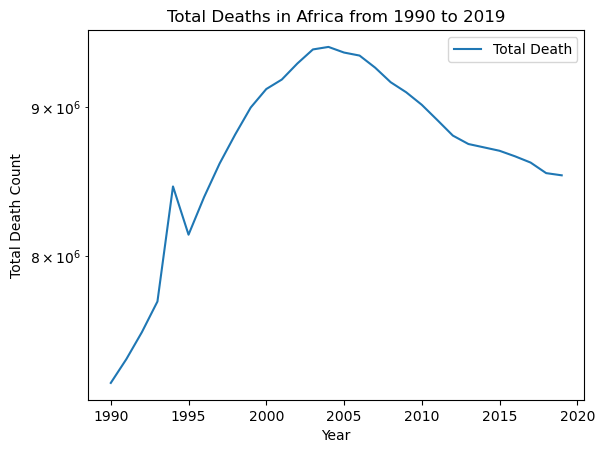

In [129]:

a_yr_new.plot(kind='line', y='Total Death')
plt.title('Total Deaths in Africa from 1990 to 2019')
plt.ylabel('Total Death Count')
plt.yscale('log');

In the above, the data showed a spike in deaths from 1990 to 1994, followed by a steep decline from 1995 to 1996 before a sharp rise to a peak of 2005. This gradually dropped all the way to 2019.

In [90]:
a_ct_new =a_ct.groupby("Country_Name").sum()

In [91]:
a_ct_new.head()

,Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,Maternal disorders,HIV/AIDS,Drug use disorders,...,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis,Total Death
Country_Name,,,,,,,,,,,,,,,,,,,,,
Algeria,15685.0,86914.0,22943.0,7138.0,70.0,24273.0,16702.0,29475.0,6101.0,10612.0,...,12337.0,6407.0,11066.0,369395.0,168453.0,91927.0,146527.0,27628.0,10492.0,4672406.0
Angola,110893.0,17704.0,4486.0,235181.0,317069.0,34337.0,20795.0,61545.0,244358.0,1190.0,...,14022.0,229863.0,2195.0,241350.0,101847.0,119381.0,190974.0,15712.0,14431.0,5429048.0
Benin,69978.0,13464.0,3804.0,44748.0,316834.0,11517.0,16162.0,34853.0,80892.0,261.0,...,5654.0,43399.0,0.0,45197.0,44797.0,46718.0,79638.0,7791.0,6281.0,2230478.0
Botswana,3835.0,2887.0,807.0,5394.0,662.0,2607.0,9718.0,2068.0,263306.0,173.0,...,1091.0,5265.0,6.0,15000.0,18118.0,10592.0,20318.0,2748.0,325.0,712200.0
Burkina Faso,175973.0,25070.0,6915.0,140980.0,950762.0,19688.0,37008.0,46191.0,333448.0,870.0,...,13499.0,135194.0,133.0,102398.0,60148.0,77027.0,142102.0,15183.0,8774.0,4929536.0


In [92]:
ax= a_ct_new.sort_values('Total Death', ascending=False)

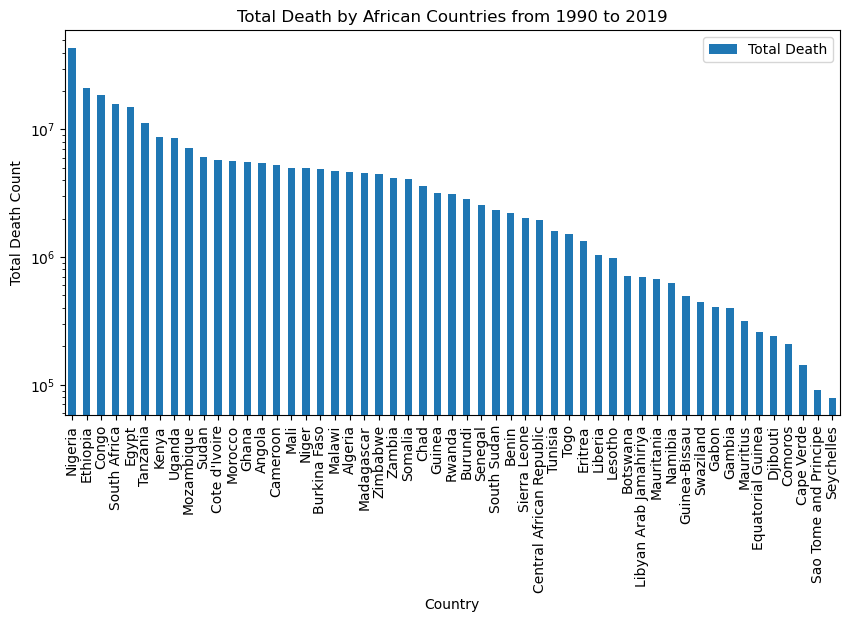

In [93]:

ax.plot(kind='bar', y='Total Death', figsize=[10, 5])
plt.title('Total Death by African Countries from 1990 to 2019')
plt.xlabel('Country')
plt.ylabel('Total Death Count')
plt.yscale('log');

The fisrt five bars represents the top five highest death count by country. The data reveals that Seychelles had the lowest death rate and Nigeria accounting for the highest.

In [94]:
afr_age.head()

,Country_Name,Year,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
0,Algeria,1990,45295,28519,26069,7856,45891
1,Algeria,1991,46269,29803,25786,7224,43714
2,Algeria,1992,47879,30238,26364,7056,41813
3,Algeria,1993,49385,30771,26955,6899,40063
4,Algeria,1994,51193,31202,28917,6923,38320


In [95]:
afr_age_df = afr_age.groupby('Year').sum()

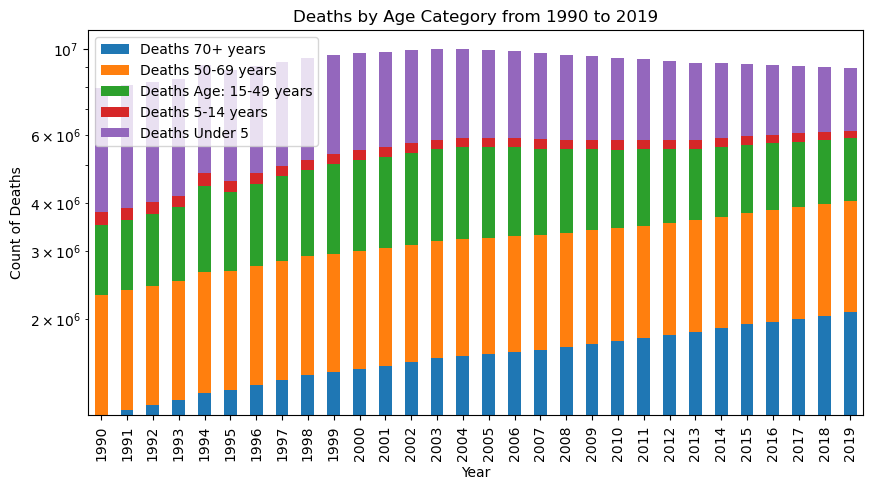

In [96]:
afr_age_df.plot(kind='bar', stacked=True, figsize=[10,5])
plt.title('Deaths by Age Category from 1990 to 2019')
plt.ylabel('Count of Deaths')
plt.yscale('log');


In all five age groups, we can see a pattern in death population across 1990 to 2019. The Death population of 50 years and above increased gradually over the years. That of group 13-49 years witnessed a gentle rise and fall in death population. The 5-14 years groups are atributed with a gentle rise from 1990 with a spike on 1994, then declining the next year with an associated gentle rise up until 2004 where in remained relatively fixed till 2013 and increased further from there. The under 5 years groups had a gentle rise from 1990, reaching a peak at 2004 and then falling gradually. 

In [97]:
afr_age_df1 = afr_age.drop('Year', axis=1, inplace=False)

In [98]:
afr_age_df2 = afr_age_df1.groupby('Country_Name').sum()

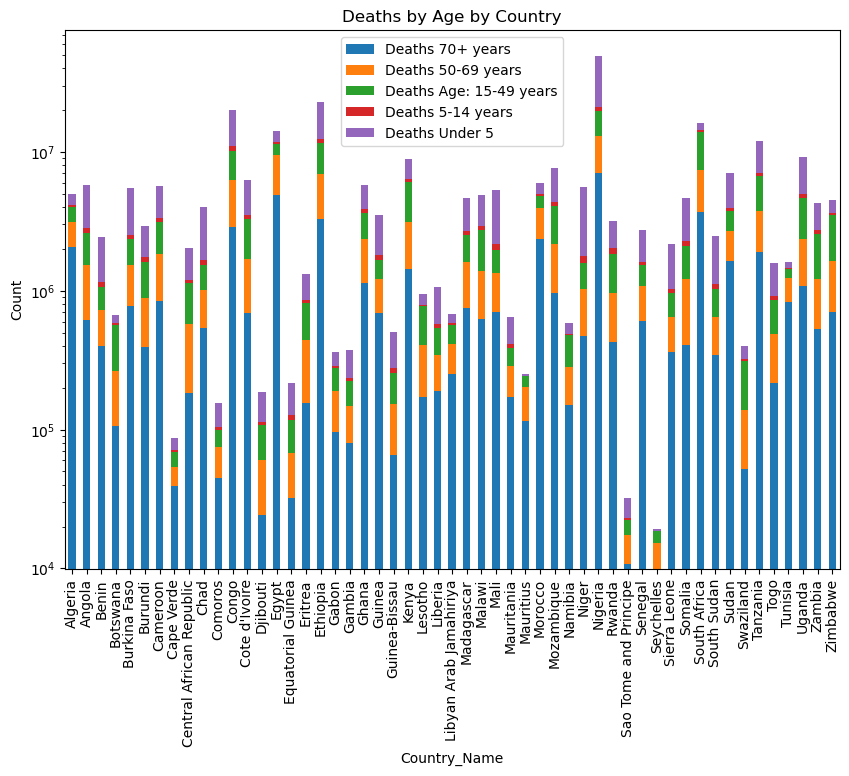

In [99]:
afr_age_df2.plot(kind='bar', stacked=True, figsize=[10,7])
plt.title('Deaths by Age by Country')
plt.ylabel('Count')
plt.yscale('log');

The data set clearly shows that persons who were aged 70 and above died more in africa as compared to other aged groups. Nigeria accounted for more death population with Seychelles being the least.

In [100]:
afr_pop_df = afr_pop[afr_pop['Year'] < 2020]

In [101]:
ax=afr_pop_df.sort_values('Population', ascending=False)

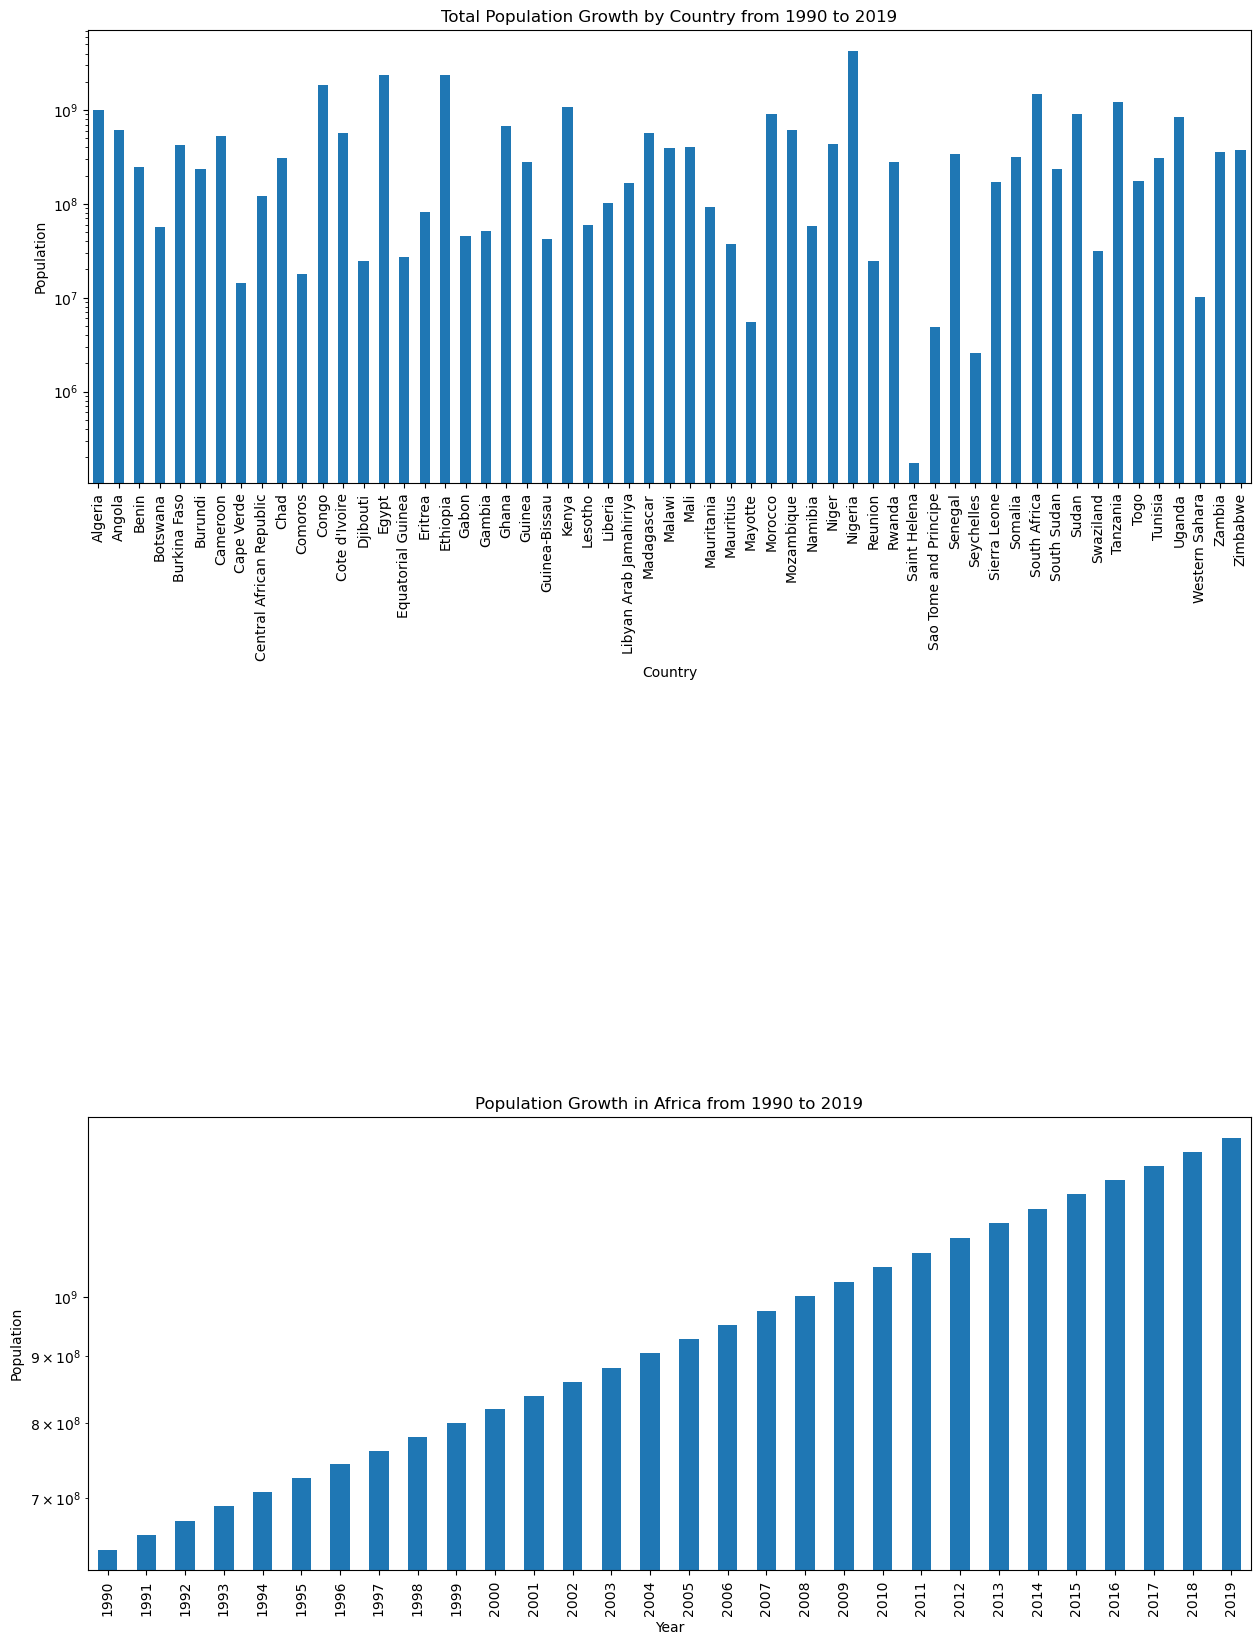

In [102]:

plt.figure(figsize=[15,20])

plt.subplot(3,1,1)

afr_pop_df.groupby('Country_Name')['Population'].sum().plot(kind='bar')
plt.title('Total Population Growth by Country from 1990 to 2019')
plt.xlabel('Country')
plt.ylabel('Population')
plt.yscale('log')

plt.subplot(3,1,3)

afr_pop_df.groupby('Year')['Population'].sum().plot(kind='bar')
plt.title('Population Growth in Africa from 1990 to 2019')
plt.ylabel('Population')
plt.yscale('log');


The fisrt chart shows the total population growth by country from 1990 to 2019.

The second chart shows the population growth in Africa from 1990 to 2019.

In [103]:
afr_doctors.head()

,Location,Period,Value
0,Angola,2018,2.14
1,Angola,2017,2.15
2,Angola,2009,1.31
3,Angola,2004,0.62
4,Angola,1997,0.59


In [104]:
mx =afr_doctors.groupby('Location')['Value'].mean().max()
mn =afr_doctors.groupby('Location')['Value'].mean().min()

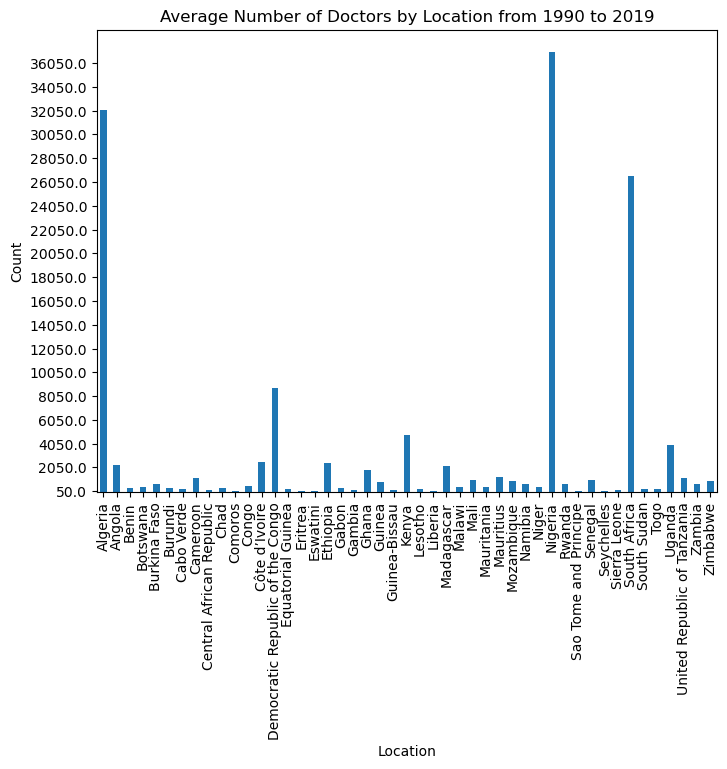

In [105]:
#Doctors per 10,000 persons
tick=np.arange(50, mx+500, 2000)

plt.figure(figsize=[8,6])
afr_doctors.groupby('Location')['Value'].mean().plot(kind='bar')
plt.title('Average Number of Doctors by Location from 1990 to 2019')
plt.ylabel('Count')
plt.yticks(tick, tick);

The average number of doctors in this chart shows that Nigeria has the had the highest with an average of 35,000 doctors per year

In [106]:
#Health expenditure by %GDP
afr_che.head()

,Country_Name,Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Algeria,DZA,3.489033,3.837877,3.730042,3.601041,3.544073,3.235161,3.355102,3.821416,...,5.117172,5.267481,6.000510,6.035763,6.547214,6.978489,6.607496,6.279384,6.163026,6.243371
1,Angola,AGO,1.908599,4.483516,3.329461,3.547973,3.967201,2.852197,2.685537,2.974388,...,2.695100,2.645608,2.395750,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360
2,Botswana,BWA,5.827264,6.156716,6.421541,6.176169,5.795304,5.025351,4.773733,5.333117,...,6.194025,5.776903,6.141460,6.224388,5.597931,5.726299,5.560522,6.134534,5.968672,6.048366
3,Burundi,BDI,6.176971,6.404844,6.472161,6.313277,7.701042,8.423713,9.942323,10.580819,...,11.276376,10.069978,8.526685,8.537285,7.315492,6.428827,7.719209,7.903018,8.244769,7.990914
4,Cameroon,CMR,4.297622,4.097513,4.294797,4.268264,4.015150,4.095445,4.028973,3.959409,...,3.758915,4.016860,4.073135,3.784994,3.951177,3.748792,3.729508,3.492165,3.465106,3.595395


In [107]:
afr_che_df = afr_che.drop('Code', axis=1, inplace=False)

In [108]:
total_mean= afr_che_df.mean(axis=1)

C:\Users\UG\AppData\Local\Temp\ipykernel_80\1804233478.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_mean= afr_che_df.mean(axis=1)


In [109]:
afr_che_df['Mean']=total_mean

In [110]:
afr_che_df.head()

,Country_Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean
0,Algeria,3.489033,3.837877,3.730042,3.601041,3.544073,3.235161,3.355102,3.821416,4.201884,...,5.267481,6.000510,6.035763,6.547214,6.978489,6.607496,6.279384,6.163026,6.243371,4.970746
1,Angola,1.908599,4.483516,3.329461,3.547973,3.967201,2.852197,2.685537,2.974388,3.322905,...,2.645608,2.395750,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360,2.950085
2,Botswana,5.827264,6.156716,6.421541,6.176169,5.795304,5.025351,4.773733,5.333117,5.782003,...,5.776903,6.141460,6.224388,5.597931,5.726299,5.560522,6.134534,5.968672,6.048366,5.859465
3,Burundi,6.176971,6.404844,6.472161,6.313277,7.701042,8.423713,9.942323,10.580819,9.235422,...,10.069978,8.526685,8.537285,7.315492,6.428827,7.719209,7.903018,8.244769,7.990914,8.280667
4,Cameroon,4.297622,4.097513,4.294797,4.268264,4.015150,4.095445,4.028973,3.959409,3.822916,...,4.016860,4.073135,3.784994,3.951177,3.748792,3.729508,3.492165,3.465106,3.595395,3.911774


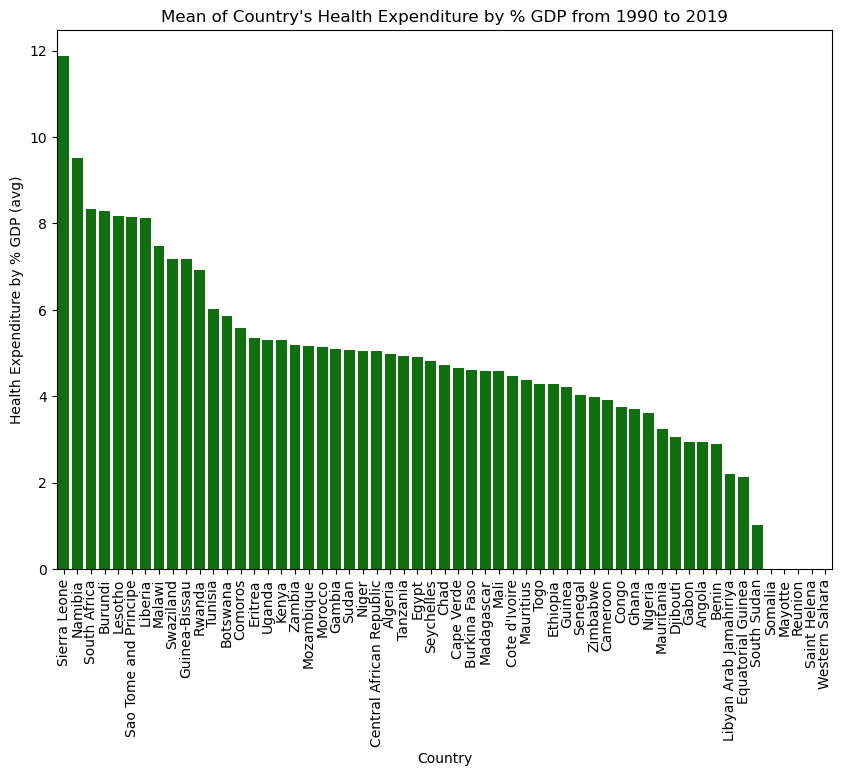

In [111]:
ax = afr_che_df.loc[:,['Country_Name','Mean']].sort_values('Mean', ascending=False)

plt.figure(figsize=[10,7])

sb.barplot(data=ax, x='Country_Name', y='Mean', color='green')

plt.title('Mean of Country\'s Health Expenditure by % GDP from 1990 to 2019')
plt.xlabel('Country')
plt.ylabel('Health Expenditure by % GDP (avg)')
plt.xticks(rotation= 90);

From the data above, we can clearly see that Sierra Leone has spent more on health in terms of comparison with their GDP followed by Namibia. The country with the least is South Sudan.

In [112]:
ax = afr_dt.drop(["Country_Name", "Year", "Total Death"], axis=1, inplace=False)

In [113]:
ax_df= ax.sum().sort_values(ascending= False)

C:\Users\UG\AppData\Local\Temp\ipykernel_80\1180355691.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax_df= ax.sum().sort_values(ascending= False)


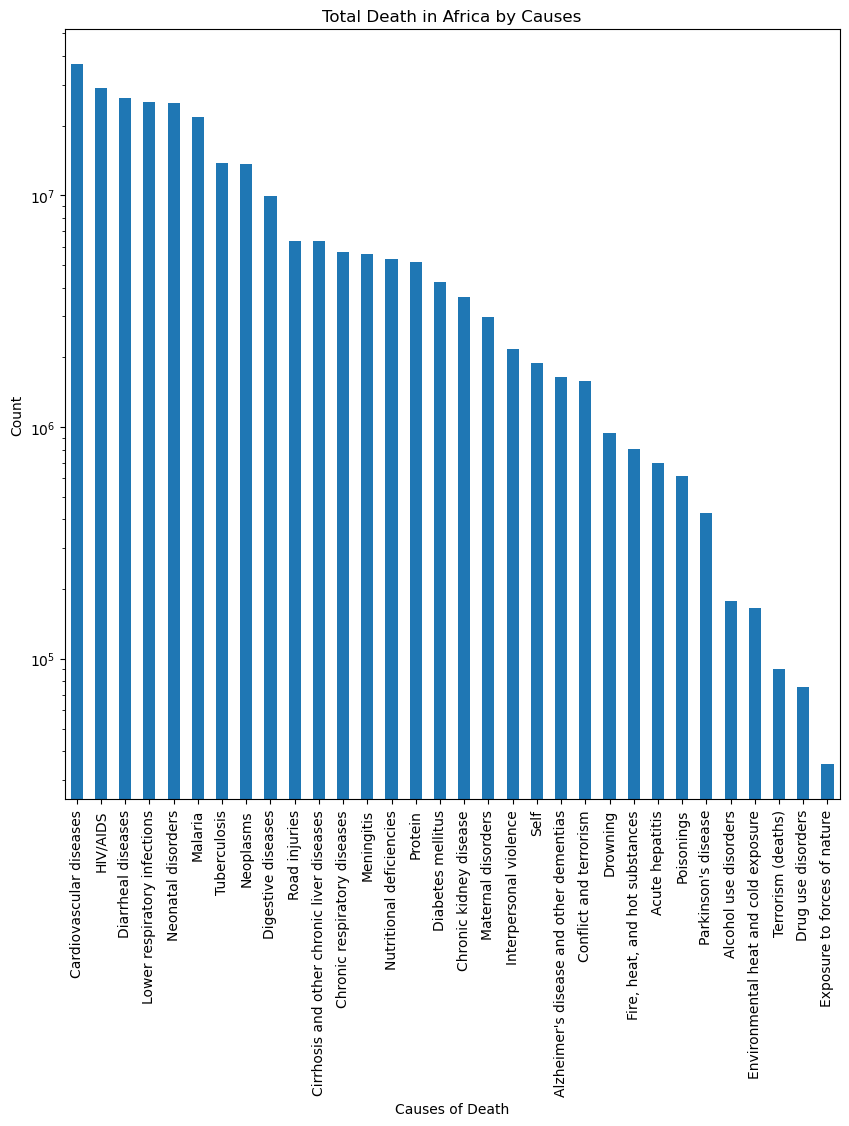

In [114]:

plt.figure(figsize=[10,10])
ax_df.plot(kind="bar")
plt.title("Total Death in Africa by Causes")
plt.xlabel("Causes of Death")
plt.ylabel("Count")
plt.yscale('log');

The chart shows the prevalent causes of death in Africa. A greater population is likely to die off by cardiovascular diseases, HIV/AIDS, diarrheal diseases, etc. Fewer than 100,000 died by the forces of nature.

### Paired relationship

In [115]:
#avg death by year to avg health expenditure by %GDP by year

In [116]:
afr_dt.head()

,Country_Name,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,...,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis,Total Death
0,Algeria,1990,0,838.0,1337.0,439.0,453.0,9.0,1207.0,491.0,...,485.0,422.0,3.0,13438.0,4410.0,2401.0,3981.0,1113.0,486.0,136135.0
1,Algeria,1991,0,794.0,1411.0,451.0,439.0,9.0,1136.0,484.0,...,469.0,408.0,42.0,13120.0,4481.0,2456.0,4033.0,1078.0,478.0,136294.0
2,Algeria,1992,0,763.0,1494.0,470.0,427.0,12.0,1111.0,497.0,...,464.0,396.0,236.0,13115.0,4571.0,2500.0,4083.0,1071.0,472.0,137749.0
3,Algeria,1993,0,736.0,1582.0,488.0,417.0,12.0,1092.0,513.0,...,461.0,386.0,0.0,13154.0,4668.0,2542.0,4136.0,1067.0,470.0,138894.0
4,Algeria,1994,0,708.0,1675.0,509.0,402.0,8.0,1086.0,553.0,...,460.0,370.0,500.0,13326.0,4773.0,2588.0,4193.0,1095.0,469.0,142531.0


In [117]:
avg_dt = afr_dt.groupby('Year').mean()

In [118]:
mdx=avg_dt.drop(avg_dt.iloc[:,:32], axis=1, inplace=False)

In [119]:
mdx.head()

,Total Death
Year,
1990,133993.500000
1991,136532.777778
1992,136936.945455
1993,142889.944444
1994,156473.777778


In [120]:
chx =afr_che_df.iloc[:,1:21]

In [121]:
chx.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,3.489033,3.837877,3.730042,3.601041,3.544073,3.235161,3.355102,3.821416,4.201884,5.359395,5.117172,5.267481,6.000510,6.035763,6.547214,6.978489,6.607496,6.279384,6.163026,6.243371
1,1.908599,4.483516,3.329461,3.547973,3.967201,2.852197,2.685537,2.974388,3.322905,3.842609,2.695100,2.645608,2.395750,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360
2,5.827264,6.156716,6.421541,6.176169,5.795304,5.025351,4.773733,5.333117,5.782003,6.525008,6.194025,5.776903,6.141460,6.224388,5.597931,5.726299,5.560522,6.134534,5.968672,6.048366
3,6.176971,6.404844,6.472161,6.313277,7.701042,8.423713,9.942323,10.580819,9.235422,10.350219,11.276376,10.069978,8.526685,8.537285,7.315492,6.428827,7.719209,7.903018,8.244769,7.990914
4,4.297622,4.097513,4.294797,4.268264,4.015150,4.095445,4.028973,3.959409,3.822916,3.739336,3.758915,4.016860,4.073135,3.784994,3.951177,3.748792,3.729508,3.492165,3.465106,3.595395


In [122]:
chxx=afr_che_df.melt(id_vars='Country_Name', value_vars=chx, var_name='Year', value_name='Health exp by %GDP')

In [123]:
che_avg=chxx.groupby('Year').mean()

In [124]:
chdr =mdx.merge(che_avg, how='left', left_index=True, right_index=True)

In [125]:
chdr.head(11)

,Total Death,Health exp by %GDP
Year,,
1990,133993.500000,NaN
1991,136532.777778,NaN
1992,136936.945455,NaN
1993,142889.944444,NaN
1994,156473.777778,NaN
1995,150627.277778,NaN
1996,155165.833333,NaN
1997,159336.629630,NaN
1998,163024.777778,NaN


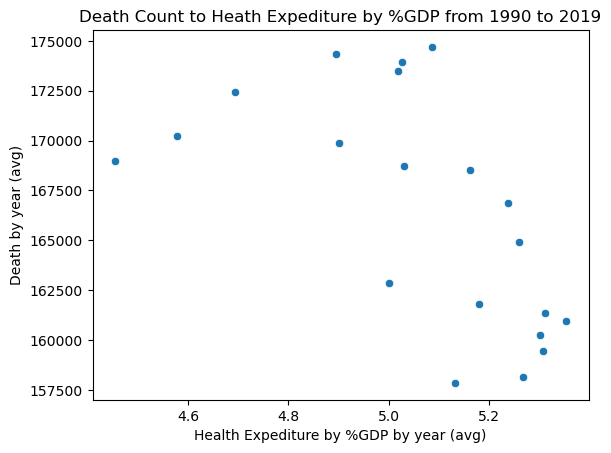

In [126]:
sb.scatterplot(data=chdr, y='Total Death', x='Health exp by %GDP', )
plt.title('Death Count to Heath Expediture by %GDP from 1990 to 2019')
plt.ylabel('Death by year (avg)')
plt.xlabel('Health Expediture by %GDP by year (avg)');

On an average, across the years, the chart shows that as the health expenditure increased, the death population reduced.

## RECOMMENDATION

From the insights generated, I can recommend that:

1. Africa needs to have an efficient plan to take care of its elderly.
2. Increase spending in the health sector.
3. Employ more doctors esppecially in countries with a higher population.
4. Set up measures to tackle cardiovascular diseases, HIV/AIDS, diarrheal, etc.